This comprehensive guide aims to provide an in-depth introduction to automated text analysis techniques, covering essential steps such as data preprocessing, feature extraction, and modeling. Additionally, we will explore various applications of text analysis, including sentiment analysis, topic modeling, and named entity recognition.

Throughout this exercise, we will adopt a step-by-step approach, starting with the preparation of our textual data for analysis and culminating in an understanding of how a text search engine operates.

# Text Cleaning for ML

You cannot go straight from raw text to fitting a machine learning or deep learning model.

You must clean your text first, which means splitting it into words and handling punctuation and case.

In fact, there is a whole suite of text preparation methods that you may need to use, and the choice of methods really depends on your natural language processing task.

In this section we will learn:
- How to get started by developing your own very simple text cleaning tools.
- How to take a step up and use the more sophisticated methods in the NLTK library.
- How to prepare text when using modern text representation methods like word embeddings.

When working with unstructured text data, we cannot proceed directly to modeling without properly preparing our dataset first. This initial step is known as **text preprocessing**, and it's essential for several reasons.

Firstly, raw text often contains punctuation, special characters, and mixed case, which can hinder the performance of machine learning models if not handled correctly. Secondly, natural language processing tasks require specific formatting, such as **tokenization** and **stemming** or **lemmatizing** (reducing words to their base form).

In this section we will learn:
- How to get started by developing your own very simple text cleaning tools.
- How to take a step up and use the more sophisticated methods in the NLTK library.
- How to prepare text when using modern text representation methods like word embeddings.

## First step: Dataset

In this tutorial, we will use the text from the book Metamorphosis by Franz Kafka.

The full text for Metamorphosis is available for free from Project Gutenberg but it is already downloaded in this project.

- http://www.gutenberg.org/cache/epub/5200/pg5200.txt

The file contains header and footer information that we are not interested in, specifically copyright and license information. We will open the file and delete the header and footer information, save the file as “metamorphosis_clean.txt“ and place it in the resources folder.

In [73]:
# Load text
filename = 'resources/metamorphosis_clean.txt'
file = open(filename, 'rt')
original_text = file.read()
file.close()

We will be leveraging NLTK for our text cleaning tasks

In [74]:
# Download resources from NLTK text processing library
import nltk

# The 'punkt' dataset contains a set of pre-trained sentence segmentation models for several languages.
nltk.download('punkt')      

# Stopwords are common words that don't add much meaning to a sentence, such as "the", "and", etc.,
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Simple text cleaning techniques

Clean text often means a list of words or tokens that we can work with in our machine learning models.

This means converting the raw text into a list of words and saving it again.

In [75]:
# Split text by white space
words = original_text.split()
print(words[:100])

['ï»¿One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


We can see that punctuation is preserved (e.g. “wasn’t” and “armour-like“)

One way to remove punctuation, preserving contractions together is spliting the document into words by white space, then use string translation to replace all punctuation with nothing (e.g. remove it).

In [76]:
import string

# Split text by white space
words = original_text.split()

# Create a translation table that maps punctuation characters to their respective 
# replacement strings (in this case, an empty string).
table = str.maketrans('', '', string.punctuation) # from='', to='', ascii punctuation

# Apply the translation table to each word
stripped = [w.translate(table) for w in words]

print(stripped[:100])

['ï»¿One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human']


Lets now normalize case

In [77]:
# Split text by white space
words = original_text.split()

# convert to lower case
words = [word.lower() for word in words]

print(words[:100])

['ï»¿one', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper', 'human']


#### Tokenization and Cleaning with NLTK

Split into Sentences
- Some modeling tasks require their input to be in the form of paragraphs or sentences, such as **word2vec**.

In [78]:
from nltk import sent_tokenize

# Tokenize the original text into individual sentences
sentences = sent_tokenize(original_text)

print(sentences[0])

ï»¿One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


Split into Words
- NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words).

- It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens. Contractions are split apart (e.g. “What’s” becomes “What” “‘s“). Quotes are kept, and so on.

In [79]:
from nltk.tokenize import word_tokenize

# tokenize the original text
tokens = word_tokenize(original_text)

# print the first 100 tokens
print(tokens[:100])

['ï', '»', '¿One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s"]


Filter Out Punctuation
- We can filter out all tokens that we are not interested in, such as all standalone punctuation.

In [80]:
from nltk.tokenize import word_tokenize

# Remove all tokens that are not alphabetic by creating a new list of words that only 
# include those with at least one alphabetical character.
words = [word for word in word_tokenize(original_text) if word.isalpha()]

print(words[:100])

['ï', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room']


Filter out Stop Words
- Stop words are words that do not contribute to the deeper meaning of the phrase, such as: “the“, “a“, and “is“.
- For some applications like documentation classification, it may make sense to remove stop words.

In [81]:
from nltk.corpus import stopwords

# tokenize the original text
tokens = word_tokenize(original_text)

# Create a list of English stop words.
stop_words = stopwords.words('english')

print(stop_words)

# Remove stop words from our text
words = [w for w in words if not w in tokens]
print(words[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Stem Words
- Stemming refers to the process of reducing each word to its root or base.
- For example “fishing,” “fished,” “fisher” all reduce to the stem “fish.”
- Some applications, like document classification, may benefit from stemming in order to both reduce the vocabulary and to focus on the sense or sentiment of a document rather than deeper meaning.

In [82]:
from nltk.stem.porter import PorterStemmer

# Split into words
tokens = word_tokenize(original_text)

# Initialize stemmer algorithm
porter = PorterStemmer()

# Apply stemming to each token and store the results in a list
stemmed = [porter.stem(word) for word in tokens]

print(stemmed[:100])

['ï', '»', '¿one', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'he', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s"]


### Cleaning conclussions

Recent advancements in NLP have shifted our focus away from traditional **bag-of-word** models and **bag-of-word** techniques towards the use of **word embeddings**. 

- Firstly, **word embeddings** enable us to encode each word as a dense vector that captures its semantic meaning within the context of the training text. This allows us to represent words with similar meanings or concepts in close proximity to one another in the embedding space. In other words, word embeddings learn to capture subtle nuances and relationships between words.

- Secondly, this approach enables us to sidestep many traditional text cleaning steps that were necessary when working with bag-of-word models. With word embeddings, we can automatically account for variations such as case, spelling, punctuation, and other surface-level differences without requiring explicit preprocessing.

This means that our text preprocessing pipelines may need to be revisited and potentially simplified. For instance, we may no longer need to stem words or remove punctuation marks from contractions, as the word embeddings will learn to capture these subtleties on their own.

We will explore concepts like **bag-of-word**, **bag-of-word** and **word embeddings** in future sections.

# Document Clustering

In this section it is explained how to cluster a collection of documents. The goal of the example is to identify the latent structures within the synopses of the top 100 films of all time (per an IMDB list). To do so, we will be:

- tokenizing and stemming each synopsis
- transforming the corpus into vector space using tf-idf
- calculating cosine distance between each document as a measure of similarity
- clustering the documents using the k-means algorithm
- using multidimensional scaling to reduce dimensionality within the corpus
- conducting a hierarchical clustering on the corpus using Ward clustering
- topic modeling using Latent Dirichlet Allocation (LDA)

In [83]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction

We will be using txts with IMDB adn Wikipedia information scrapped from the web, which we previously prepared.

In [84]:
# Paths for IMDB txt we will be using
title_list = 'resources/title_list.txt'
link_list = 'resources/link_list_imdb.txt'
synopses_list_wiki = 'resources/synopses_list_wiki.txt'
synopses_list_imdb = 'resources/synopses_list_imdb.txt'
genres_list = 'resources/genres_list.txt'

## Cleaning the synopses

Now we will create lists for our titles, links, synopses and genres

In [85]:
# Read files and split it into a list of strings
with open(title_list, encoding="utf8") as f:
    titles = [line.strip() for line in f.readlines()][:100]

with open(link_list, encoding="utf8") as f:
    links = [line.strip() for line in f.readlines()][:100]

with open(genres_list, encoding="utf8") as f:
    genres = [line.strip() for line in f.readlines()][:100]

with open(synopses_list_wiki, encoding="utf8") as f:
    # The synopses file is split at 'BREAKS HERE' to separate the wiki synopses
    synopses_wiki = f.read().split('\n BREAKS HERE')[:100]

with open(synopses_list_imdb, encoding="utf8") as f:
    # The synopses file is split at 'BREAKS HERE' to separate the wiki synopses
    synopses_imdb = f.read().split('\n BREAKS HERE')[:100]

# Clean the synopses by removing HTML formatting and converting them to Unicode
synopses_clean_wiki = []
for text in synopses_wiki:
    synopses_clean_wiki.append(BeautifulSoup(text, 'html.parser').get_text())
synopses_clean_imdb = []
for text in synopses_imdb:
    synopses_clean_imdb.append(BeautifulSoup(text, 'html.parser').get_text())

# Join synopses
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

print(f'({len(titles)}) Titles: {titles[:5]} ...')
print(f'({len(links)}) Links: {links[:5]} ...')
print(f'({len(synopses)}) Synopses: {synopses[0][:100]} ...')
print(f'({len(genres)}) Genres: {genres[0][:100]} ...')


(100) Titles: ['The Godfather', 'The Shawshank Redemption', "Schindler's List", 'Raging Bull', 'Casablanca'] ...
(100) Links: ['http://www.imdb.com/title/tt0068646/', 'http://www.imdb.com/title/tt0111161/', 'http://www.imdb.com/title/tt0108052/', 'http://www.imdb.com/title/tt0081398/', 'http://www.imdb.com/title/tt0034583/'] ...
(100) Synopses:  Plot  [edit]  [  [  edit  edit  ]  ]  
  On the day of his only daughter's wedding, Vito Corleone h ...
(100) Genres: [u' Crime', u' Drama'] ...


In [86]:
# Index for each item in the corpus, will be used for scoring later
ranks = []
for i in range(0,len(titles)):
    ranks.append(i)
ranks[:3]

[0, 1, 2]

Lets implement some helper cleaning functions for our texts

In [87]:
from nltk.stem.snowball import SnowballStemmer

# Improved steemer
stemmer = SnowballStemmer("english")

def tokenize_only(text):
    # Tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

def tokenize_and_stem(text):

    filtered_tokens = tokenize_only(text=text)

    stems = [stemmer.stem(t) for t in filtered_tokens]

    return stems

Now, we will create two vocabularies: one stemmed and one only tokenized. 

In [88]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

# Create a pandas Data Frame for th whole vocab 
vocab_df = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_df.shape[0]) + ' items in vocab_df')

there are 312303 items in vocab_df


In [89]:
vocab_df.head()

,words
plot,plot
edit,edit
edit,edit
edit,edit
on,on


In [90]:
# Remove duplicates
vocab_df.drop_duplicates(inplace=True)
print('there are ' + str(vocab_df.shape[0]) + ' items in vocab_df')
vocab_df.head()

there are 17696 items in vocab_df


,words
plot,plot
edit,edit
on,on
the,the
day,day


## TF-IDF 

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique in NLP used to calculate the importance of words in a document or corpus. It's a way to measure how unique or representative each word is across all documents.

- Term Frequency (TF): Calculate the frequency of each word (term) in a document. This gives you an idea of how many times that word appears.

- Inverse Document Frequency (IDF): Calculate the inverse frequency of each word across all documents. This measures how rare or common that word is across the entire corpus.

Our main idea in this section is to obtain a TF-IDF matrix, vectorizing our corpus.To get a TF-IDF matrix:
- First count word occurrences by document (synopses), generating a document-term matrix (dtm).  
- Then apply the term frequency-inverse document frequency weighting.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer object with specified parameters.
# max_df (float): The maximum proportion of documents in which
#                each feature must occur. Features that appear more
#                frequently than this proportion will be ignored.
# max_features (int): The maximum number of features to extract (dimensions).
tfidf_vectorizer = TfidfVectorizer(max_df=0.8,  # 80% of docs contain the word
                                     max_features=200000,   
                                     min_df=0.2,             # Minimum proportion of documents containing the word
                                     stop_words='english',    
                                     use_idf=True,            # Use inverse document frequency
                                     tokenizer=tokenize_and_stem,   # Tokenizer function
                                     ngram_range=(1,3))       # Consider 1-gram and bigrams

# Apply the TF-IDF transformation to the given list of synopses.
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

tfidf_matrix.shape  

c:\Users\javie\Programacion\GitHub\Text-Processing-Fundamentals\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\javie\Programacion\GitHub\Text-Processing-Fundamentals\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'them

(100, 563)

## K-Means clustering

Once we have our corpus vectorized, we can start implementing some ML techniques. In this section we will be clustering the corpus using K-Means, to better understand the hidden structure within the synopses.

- K-Means is a clustering algorithm that groups similar data points into K (a predefined number) distinct clusters based on their characteristics. It's an iterative process that aims to minimize the variance within each cluster while maximizing the distance between clusters.

- Firstly, K-Means Initialized selecting K centroids from the dataset. Secondly, it assigns each data point to the closest centroid based on a distance metric (e.g., Euclidean, Manhattan). Next, K-Means updates each centroid by calculating the mean of all assigned data points in that cluster. This process is repeated until the centroids no longer change significantly or a stopping criterion is met.

- Some limitations are: K-Means assumes that the clusters are roughly spherical in shape, which might not always be the case. It is sensitive to initialization, and K-Means is not designed to handle cases where clusters overlap or have complex shapes.

In [123]:
from sklearn.cluster import KMeans

# Number of clusters (K) 
num_clusters = 3

# Initialize K-Means 
km = KMeans(n_clusters=num_clusters)

# Fit the K-Means algorithm to the TF-IDF matrix
clusters = km.fit_predict(tfidf_matrix)

In [124]:
# Now we will create a DF for all titles, genres, synopses, ranks, links and cluster asociated to them

# Create a dict with all future columns
films_dict = {'Title': titles, 'Rank': ranks, 'Synopsis': synopses, 'Cluster': clusters, 'Genre': genres}

# Create the DF
movie_df = pd.DataFrame(films_dict)

movie_df.head()

,Title,Rank,Synopsis,Cluster,Genre
0,The Godfather,0,Plot [edit] [ [ edit edit ] ] \n On ...,1,"[u' Crime', u' Drama']"
1,The Shawshank Redemption,1,Plot [edit] [ [ edit edit ] ] \n In ...,2,"[u' Crime', u' Drama']"
2,Schindler's List,2,Plot [edit] [ [ edit edit ] ] \n In ...,1,"[u' Biography', u' Drama', u' History']"
3,Raging Bull,3,Plot [edit] [ [ edit edit ] ] \n In ...,1,"[u' Biography', u' Drama', u' Sport']"
4,Casablanca,4,Plot [edit] [ [ edit edit ] ] \n It ...,1,"[u' Drama', u' Romance', u' War']"


In [125]:
import ast

# Remove blank spaces
movie_df["Genre"] = movie_df["Genre"].apply(lambda x: str(x).replace(" ", ""))

# Convert Genres from str to list
movie_df["Genre"] = movie_df["Genre"].apply(ast.literal_eval)

movie_df.head(2)

,Title,Rank,Synopsis,Cluster,Genre
0,The Godfather,0,Plot [edit] [ [ edit edit ] ] \n On ...,1,"[Crime, Drama]"
1,The Shawshank Redemption,1,Plot [edit] [ [ edit edit ] ] \n In ...,2,"[Crime, Drama]"


In [127]:
# Explode the 'Genre' column to separate each genre entry into its own row
df_exploded = movie_df.explode('Genre')

# Group by 'Cluster' and 'Genre', and count the occurrences of each genre in each cluster
genre_count_per_cluster = df_exploded.groupby(['Cluster', 'Genre']).size().reset_index(name='Count')

genre_count_per_cluster.head()

,Cluster,Genre,Count
0,0,Action,1
1,0,Adventure,3
2,0,Comedy,1
3,0,Crime,1
4,0,Drama,5


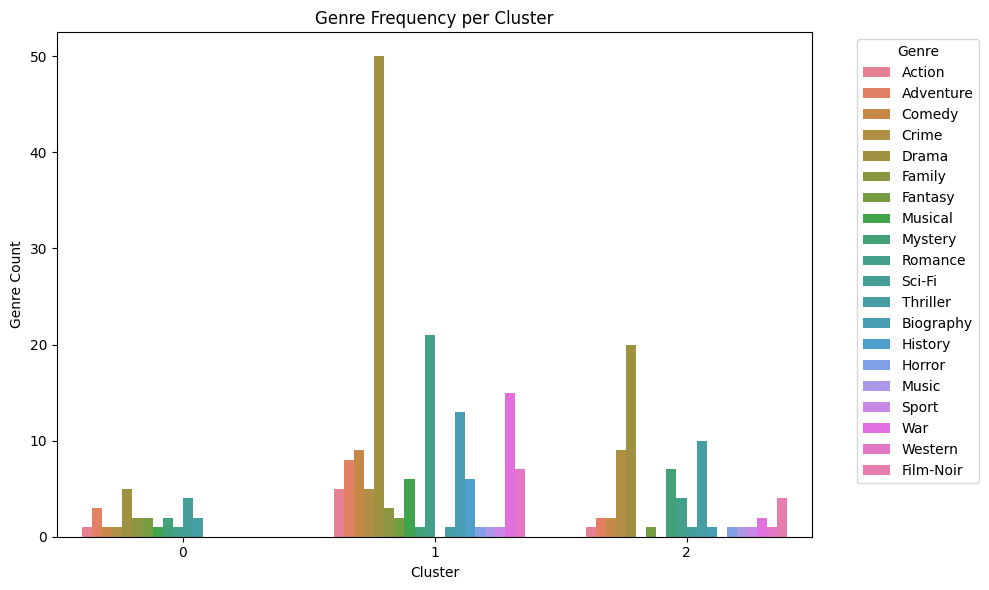

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot setup
plt.figure(figsize=(10, 6))

# Create a bar plot with 'Cluster' on the x-axis, 'Count' on the y-axis, and color-coded by 'Genre'
sns.barplot(x='Cluster', y='Count', hue='Genre', data=genre_count_per_cluster)

# Add labels and title
plt.title('Genre Frequency per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Genre Count')

# Move legend outside of the plot
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure the layout is tight so nothing overlaps
plt.tight_layout()

# Show the plot
plt.show()

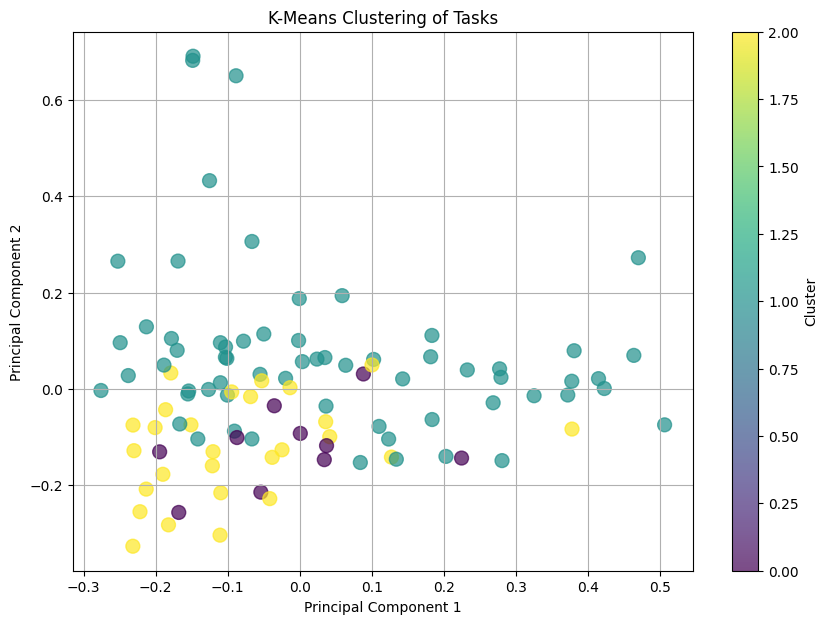

In [129]:
from sklearn.decomposition import PCA

# Lets now plot the Clusters

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=movie_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Tasks')
plt.grid(True)
plt.show()


# Word Embeddings

Word embeddings are word representations as real-valued vectors in a lower-dimensional space that capture inter-word semantics. This allows machines to analyze and compare words based on their meanings, relationships, and contexts.

In a typical word embedding model, each word is represented by a unique real-valued vector with tens or hundreds of dimensions.

From a mathematical perspective, a word embedding can be thought of as a parameterized function that maps each word to its corresponding vector representation. This is often denoted as:
$$f_\theta(W_n) = \theta_n $$

Where:
- $f_\theta$ is the mapping function
- $W_n$ represents the n-th word in the vocabulary
- $\theta$ is the set of learned parameters (vector dimensions)

## Word2Vec

Word2Vec a neural network-based embedding technique that involves first learning continuous word vectors using a simple model, and then training an N-gram Neural Network Language Model (NNLM) on top of these distributed representations of words.

To do so, there are 2 approaches:
- **Continuous Bag-of-Words (CBOW)**: where the model predicts a target word based on its context words (a sequence of surrounding words). It leverages a fixed-size window of surrounding words (e.g., 5 words) to predict the target word. And uses continuous representation, meaning that the input and output words are represented as dense vectors, which allows for capturing nuanced semantic relationships. For example, for the sentence "the dog is playing in the park”, the words fed into the model could be ([the, dog, is, in, the, park] ), followed by the target word ‘playing’. The main idea is to train a NN to predict the target word, with an embedding layer inside, and once it is trained, use the embedding layer.

- **Continuous Skip-Gram**: instead of predicting the target word (wt), it predicts the word surrounding it with context. The training objective is to learn representations, or embeddings, that are good at predicting nearby words. For example, for the sentence "the dog is playing in the park”, then the word fed into the model will be "playing", and the target words will be (the, dog, is, in, the, park).


Lets program CBOW

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# Create a function that takes a list of words (context) and a dictionary mapping words to indices (word_to_ix)
# and returns a PyTorch tensor representing the context as a sequence of indices

def make_context_vector(context, word_to_ix):
    idxs = []
    
    # Iterate over each word in the context
    for w in context:
        # For each word, look up its corresponding index in the word_to_ix dictionary
        # and append this index to the idxs list
        idxs.append(word_to_ix[w])
    
    # Convert the idxs list into a PyTorch tensor 
    return torch.tensor(idxs, dtype=torch.long)

In [4]:
raw_text = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.
I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name?
I handed in my paper, leaving the last question blank.  Before class ended, one student asked if the last question would count toward our quiz grade.
“Absolutely,” said the professor.  “In your careers you will meet many people. All are significant. They deserve your attention and care,
even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy."""

text = raw_text.split()

In [6]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMDEDDING_DIM = 100

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(text)
vocab_size = len(vocab)

word_list = list(vocab)

# Create two dictionaries for the indexes and theyr corresponding words
word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [9]:
# Create the CBOW function that takes generates a tuple, for each word in the text, with the surrounding
# words and the target word
def CBOW(text, window_size=2):
    data = []  

    # Iterate over the text
    for i in range(window_size, len(text) - window_size):  
        # Create a context by taking elements from the window around the current character (i)
        context = [text[i - window_size], text[i - (window_size - 1)], text[i + (window_size - 1)], text[i + window_size]]
        # The target is the current character itself
        target = text[i]
        # Append a tuple containing the context and target to the output list
        data.append((context, target))  

    return data  

In [10]:
data = CBOW(text)
print([d for d in data])

[(['During', 'my', 'month', 'of'], 'second'), (['my', 'second', 'of', 'nursing'], 'month'), (['second', 'month', 'nursing', 'school,'], 'of'), (['month', 'of', 'school,', 'our'], 'nursing'), (['of', 'nursing', 'our', 'professor'], 'school,'), (['nursing', 'school,', 'professor', 'gave'], 'our'), (['school,', 'our', 'gave', 'us'], 'professor'), (['our', 'professor', 'us', 'a'], 'gave'), (['professor', 'gave', 'a', 'pop'], 'us'), (['gave', 'us', 'pop', 'quiz.'], 'a'), (['us', 'a', 'quiz.', 'I'], 'pop'), (['a', 'pop', 'I', 'was'], 'quiz.'), (['pop', 'quiz.', 'was', 'a'], 'I'), (['quiz.', 'I', 'a', 'conscientious'], 'was'), (['I', 'was', 'conscientious', 'student'], 'a'), (['was', 'a', 'student', 'and'], 'conscientious'), (['a', 'conscientious', 'and', 'had'], 'student'), (['conscientious', 'student', 'had', 'breezed'], 'and'), (['student', 'and', 'breezed', 'through'], 'had'), (['and', 'had', 'through', 'the'], 'breezed'), (['had', 'breezed', 'the', 'questions,'], 'through'), (['breezed',

In [13]:
# This class defines a neural network model for Continuous Bag of Words (CBOW)
class CBOW_Model(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):  
        super(CBOW_Model, self).__init__()  

        # Define an Embedding layer that maps words to vectors of size embedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # Define a Linear layer 
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()  
        
        # Define another Linear layer that maps the output of the previous one to the vocabulary size
        self.linear2 = nn.Linear(128, vocab_size)  

    def forward(self, inputs):  
        # Embed each word in the input sequence (sum all the embeddings and view as a row vector)
        embeds = sum(self.embeddings(inputs)).view(1,-1)

        out = self.linear1(embeds)
        out = self.activation_function1(out)  
        out = self.linear2(out)

        return out  

    def get_word_embedding(self, word):  
        # Define a method to get the word embedding for a given word
        # Convert the word to its index in the vocabulary and convert it to a tensor
        word = torch.tensor([word_to_ix[word]])

        # Get the embedding for the word using the Embedding layer
        return self.embeddings(word).view(1,-1)  # View as a row vector


In [14]:
# Lets define the model
model = CBOW_Model(vocab_size, EMDEDDING_DIM)

# Loss and optimization function
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
# TRAINING
epochs = 50

for epoch in range(epochs): 
    # Initialize the total loss for this epoch
    total_loss = 0  
    
    # Iterate over each training example (context, target pair)
    for context, target in data:  

        # Create a vector representation of the context
        context_vector = make_context_vector(context, word_to_ix)

        # Pass the context vector through the model to get the log probabilities for each possible next word
        log_probs = model(context_vector)  
        
        # Calculate the loss between the predicted log probs and the actual target word
        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]])) 
        
    # Optimize at the end of each epoch
    optimizer.zero_grad()  # reset the gradients (i.e., zero out the accumulated gradients from previous iterations)
    total_loss.backward()  # backpropagate the total loss to update the model's weights
    optimizer.step()  # update the model's weights based on the gradients


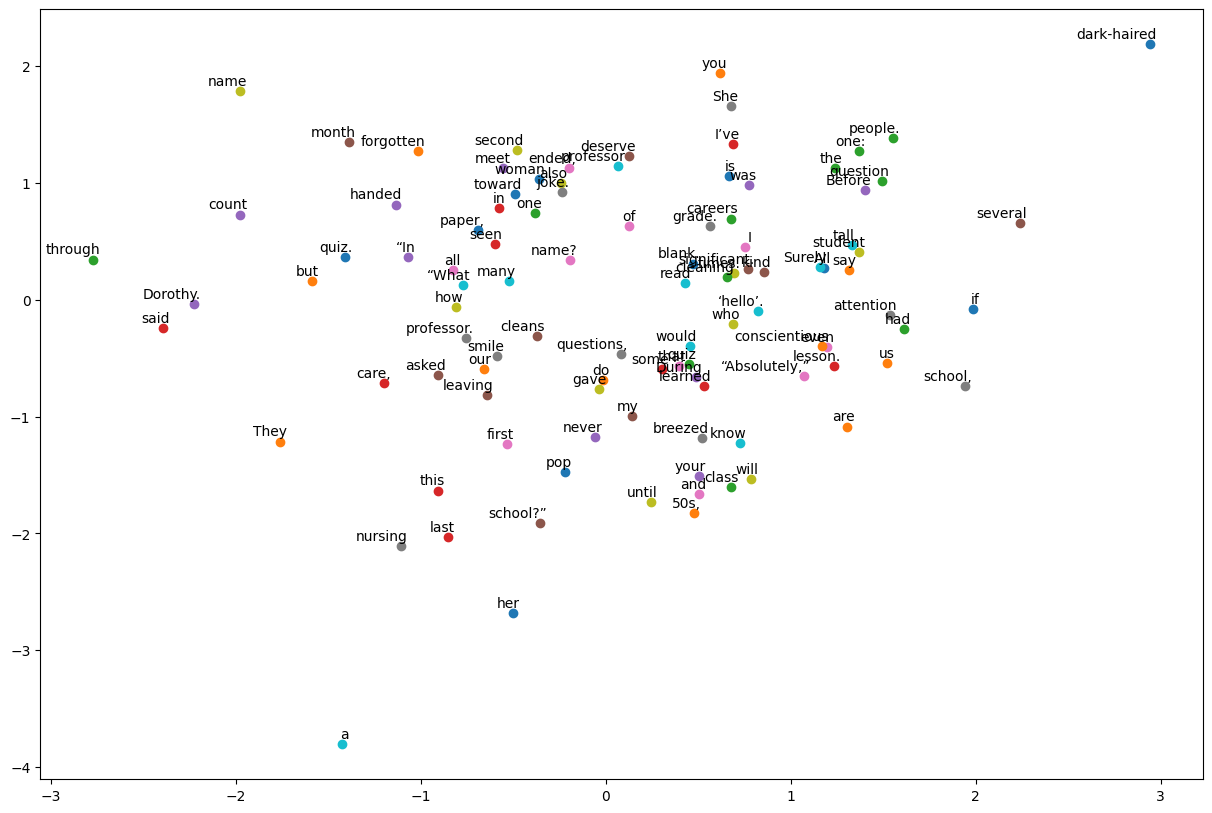

In [17]:
# Lets plot the embeddings generated for our text
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_embedding(w).detach().data.numpy()[0][0]
    y = model.get_word_embedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [22]:
# TESTING
context = ['I’ve', 'never', 'that', 'lesson.']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

# Print results
print(f'Raw text: {" ".join(text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Raw text: During my second month of nursing school, our professor gave us a pop quiz. I was a conscientious student and had breezed through the questions, until I read the last one: “What is the first name of the woman who cleans the school?” Surely this was some kind of joke. I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name? I handed in my paper, leaving the last question blank. Before class ended, one student asked if the last question would count toward our quiz grade. “Absolutely,” said the professor. “In your careers you will meet many people. All are significant. They deserve your attention and care, even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.

Context: ['I’ve', 'never', 'that', 'lesson.']

Prediction: forgotten


Lets program Continous Skip-Gram

In [23]:
# Create a fuction that generates a random batch from skip grams data
def random_batch(skip_grams, batch_size):  
    random_inputs = []  
    random_labels = []  

    # Select a random index array of size 'batch_size' without replacement
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)  

    # Iterate over the randomly selected indices
    for i in random_index:
        # For each row, append the target word (skip gram[0]) to 'random_inputs' and context word (skip gram[1]) to 'random_labels'
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    # Return the random inputs and labels
    return random_inputs, random_labels


In [24]:
raw_text = """During my second month of nursing school, our professor gave us a pop quiz.
I was a conscientious student and had breezed through the questions, until I read the last one:
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke."""
text = raw_text.split()

In [ ]:
# Set the batch size 
batch_size = 2 

# Set the embedding size 
embedding_size = 10

# Join the text into a single string with spaces, then split it into a list of words.
word_sequence = " ".join(text).split()

# Remove duplicates from the list of words by converting it to a set and then back to a list.
word_list = list(set(word_sequence))

# Create a dictionary that maps each unique word to its index in the list. This is our vocabulary.
word_dict = {w: i for i, w in enumerate(word_list)}

# The size of our vocabulary (the number of unique words).
voc_size = len(word_list)

def skipgram(word_sequence, window_size=1):
    skip_grams = []

    # Loop through the word sequence, starting from the second word and going up to the second last word.
    for i in range(window_size, len(word_sequence) - window_size):
        # The target word is the current word.
        target = word_sequence[i]

        # The context words are the words within 'window_size' of the target word.
        context = [word_sequence[i - window_size], word_sequence[i + window_size]]

        # Loop through each context word and create a Skip-Gram example by pairing it with the target word.
        for w in context:
            skip_grams.append([target, w])

    return skip_grams


In [29]:
skipgram(text)[0:2]

[['my', 'During'], ['my', 'second']]

In [30]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        
        # Define an embedding layer 
        # The size of the vocabulary (voc_size) is used as the input dimension,
        # and the embedding size is used as the output dimension.
        self.embedding = nn.Embedding(voc_size, embedding_size)
        
        # Define two linear layers:
        self.W = nn.Linear(embedding_size, embedding_size, bias=False)  
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)  

    def forward(self, X):
        # Embed input words using the learned embeddings
        embeddings = self.embedding(X)
        
        # Apply a ReLU activation function to the hidden layer
        hidden_layer = nn.functional.relu(self.W(embeddings))
        
        # Map the hidden layer back to the vocabulary size (output layer) using WT
        output_layer = self.WT(hidden_layer)
        
        return output_layer

    def get_word_embedding(self, word):
        # Convert the word to a tensor with shape `(1,)`
        word = torch.tensor([word_dict[word]])
        
        # Retrieve the learned embedding for the given word
        word_embedding = self.embedding(word).view(1, -1)
        
        return word_embedding


In [31]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# TRAINING
for epoch in tqdm(range(15000), total=len(skipgram(text))):

    # Sample a batch of input and target words from the skip-gram data
    input_batch, target_batch = random_batch(skipgram(text), batch_size=batch_size)
    
    # Convert the input and target batches to indices and then convert them to tensors
    input_batch = [word_dict[w] for w in input_batch]
    target_batch = [word_dict[w] for w in target_batch]
    input_batch = torch.LongTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    
    optimizer.zero_grad()
    output = model(input_batch)    
    loss = criterion(output, target_batch)

    if (epoch + 1) % 10000 == 0:
        # Print the epoch number and loss every 10,000 epochs
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
        
    loss.backward(retain_graph=True)
    optimizer.step()

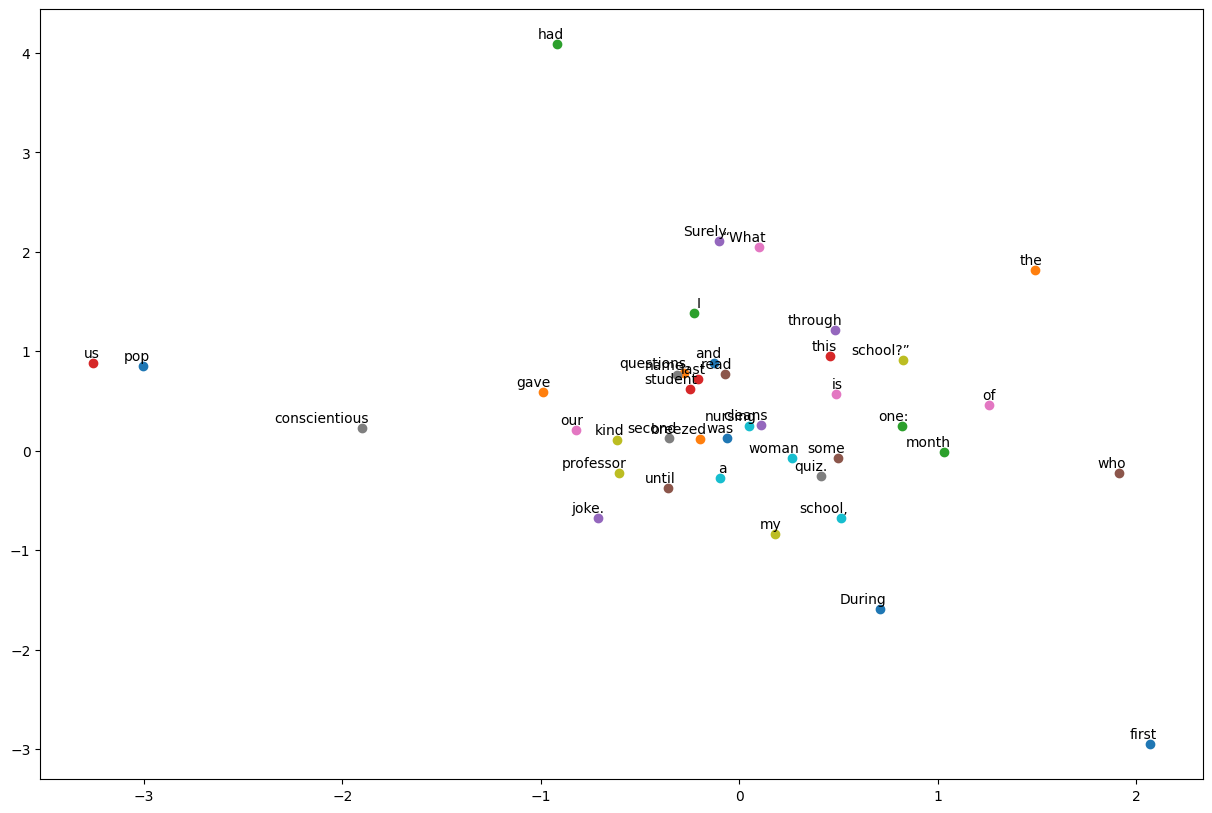

In [34]:
# PLot new embeddings
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [35]:
# Testing
pred = "During".split()

# Create an inverse dictionary word_dict_inverse, where each value in word_dict becomes a key,
# and vice versa. This is useful for looking up words by their indices
word_dict_inverse = {i: w for w, i in word_dict.items()}


model_pred = []
e = 0

# While the counter e is less than 6:
while e < 6:
    # Get the index of the most likely word for the current prediction (pred[0]) using the model
    # Convert the index to a tensor, pass it through the model, and get the predicted word
    word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[pred[0]]]))).item()]
    
    # Append the predicted word to the model_pred list
    model_pred.append(word)
    
    # Increment the counter e by 1
    e += 1

# Join all the words in the model_pred list into a single string with spaces in between
' '.join(model_pred)


'During the woman who woman who woman'

## Dynamic Embeddings

Deep contextual embeddings and sentence/word vectors could be categorized as **Dynamic Embeddings**.

- Deep contextual embeddings are designed to capture subtle nuances in language, such as word order, grammatical structure, and semantic relationships between words. This is achieved by incorporating deep neural networks into the representation learning process.

- To effectively utilize dynamic embeddings in real-world NLP applications, we require robust neural network models that can learn complex patterns in language. This is because natural language is inherently noisy, ambiguous, and context-dependent, so we will need models that can adapt to these challenges.

## ELMO

ELMO paper: https://www.google.com/url?q=https%3A%2F%2Farxiv.org%2Fabs%2F1802.05365

**ELMO (Embeddings from Language Models)** is a "contextualized" and "semi-supervised" deep learning model. Contextualized because it takes into account the context in which words appear, rather than just relying on individual word meanings, and semi-supervised because it uses labeled data for training, it also incorporates unlabeled data to improve its performance.

- In ELMO, word representations are computed using a complex architecture. Each word is represented as a function of the entire input sequence (i.e., the sentence or paragraph).

- To compute these word representations, ELMO employs two bidirectional Long Short-Term Memory (LSTM) networks. An LSTM network is a type of recurrent neural network (RNN) designed specifically for processing sequential data like text. The "bidirectional" part means that each LSTM network processes the input sequence in both forward and backward directions.

## Transformers

Attention Is All You Need: https://arxiv.org/abs/1706.03762

Visual Transformers: https://jalammar.github.io/illustrated-transformer/

Traditional models for sequential data like RNNs or LSTMs process inputs sequentially, creating bottlenecks that slow down training on large datasets; transformers, however, overcome this limitation by processing all elements in the input sequence simultaneously, enabling faster computation and greater scalability.

The key components of transformers are:

- **Self-attention mechanism**: allows the model to weigh the importance of each word relative to every other word in a sentence. For instance, in "The cat sat on the mat", self-attention helps the model understand that "cat" is more related to "sat" than "mat" in terms of action. This mechanism generates three vectors for each word: query (Q), key (K), and value (V):
    - The query (Q) vector represents a word's intent
    - The key vector (K) indicates how much attention it invites
    - The value vector (V) carries its content information
    - By computing dot products between Q and K, the Transformer calculates an "attention" score for each word pair, highlighting which words should influence each other.

- **Multi-head attention**: multiple self-attention layers work together in parallel, each focusing on different aspects of the sentence. This allows the model to capture various relationships within the sentence simultaneously. The outputs from each head are combined and then transformed linearly to produce the final attention output for that layer.

- **Position Encoding**: Since Transformers don’t process words sequentially, they need a way to understand the order of words. Position encodings are added to each word’s embedding to provide this positional information. These encodings are derived from sine and cosine functions, ensuring that the model can learn relative word positions.

- **Feed-Forward Neural Networks**: After the self-attention mechanism, the Transformer applies a feed-forward neural network (FFN) to each position independently and identically. This FFN adds a layer of nonlinear transformation, which helps the model to learn more complex representations.

- **Residual Connections and Layer Normalization**: The Transformer also uses residual connections (or skip connections) and layer normalization to improve training stability and help gradients flow through the network effectively. Residual connections enable the model to retain information from previous layers, and layer normalization ensures that the model’s outputs remain stable and well-scaled.

As regards the Transformer architecture, it consists of two main components: an encoder and a decoder. The encoder processes the input sequence (e.g., a sentence) to extract features, while the decoder generates the output sequence (e.g., translated sentence). Each layer within both the encoder and decoder has self-attention mechanisms and feed-forward networks; however, the decoder also includes an additional attention layer that focuses on the encoder's output, ensuring alignment with the generated output.

## BERT